In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


pd.set_option('display.max_columns', None)

LOCAL = './'
train_f = pd.read_csv(LOCAL + 'train_features.csv')
train_l = pd.read_csv(LOCAL + 'train_labels.csv')
test_f = pd.read_csv(LOCAL + 'test_features.csv')
sample_submission = pd.read_csv(LOCAL + 'sample_submission.csv')


In [2]:
xtrain = train_f
ytrain = train_l['status_group']

xtrain, xval , ytrain, yval = train_test_split(xtrain, ytrain, train_size=.80 ,test_size =.20, stratify = ytrain)

xtrain.shape, xval.shape, ytrain.shape, yval.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [3]:
yval.value_counts(normalize=True)

functional                 0.543098
non functional             0.384259
functional needs repair    0.072643
Name: status_group, dtype: float64

In [4]:
# remove catagorical features
xtrain_num = xtrain.select_dtypes('number')
xval_num = xval.select_dtypes('number')


In [5]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)

model.fit(xtrain_num , ytrain)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [6]:
ypred = model.predict(xval_num)

accuracy_score(yval , ypred)


0.5528619528619528

In [7]:
 # Shorthand for scoring like above
model.score(xval_num, yval)

0.5528619528619528

In [8]:
pd.Series(ypred).value_counts()


functional        10789
non functional     1091
dtype: int64

In [9]:
xtrain.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44869,2,True,40829
permit,45074,2,True,31070
source_class,47520,3,groundwater,36632
management_group,47520,5,user-group,41999
quantity_group,47520,5,enough,26495
quantity,47520,5,enough,26495
waterpoint_type_group,47520,6,communal standpipe,27685
quality_group,47520,6,good,40654
payment_type,47520,7,never pay,20259


In [10]:
xtrain['source_class'].value_counts()

groundwater    36632
surface        10676
unknown          212
Name: source_class, dtype: int64

In [11]:
xtrain['quantity'].value_counts(dropna=True)

enough          26495
insufficient    12124
dry              5010
seasonal         3255
unknown           636
Name: quantity, dtype: int64

In [12]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(xtrain['quantity'])
encoded.head()

,quantity_insufficient,quantity_enough,quantity_dry,quantity_seasonal,quantity_unknown
32789,1,0,0,0,0
21521,0,1,0,0,0
18610,0,0,1,0,0
52267,0,1,0,0,0
43621,1,0,0,0,0


In [13]:
categorical_features = ['quantity']
numeric_features = xtrain.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = xtrain[features]
X_val_subset = xval[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, ytrain)
print('Validation Accuracy', model.score(X_val_scaled, yval))

/home/gunther/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/gunther/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/gunther/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


Validation Accuracy 0.6515993265993266


In [14]:
print(xtrain.shape)
xtrain[:1].T

(47520, 40)


,32789
id,55258
amount_tsh,0
date_recorded,2013-02-26
funder,Government Of Tanzania
gps_height,1380
installer,DWE
longitude,37.4266
latitude,-3.31043
wpt_name,Kwa Kimambo
num_private,0


In [15]:

xtrain_num.shape

(47520, 10)

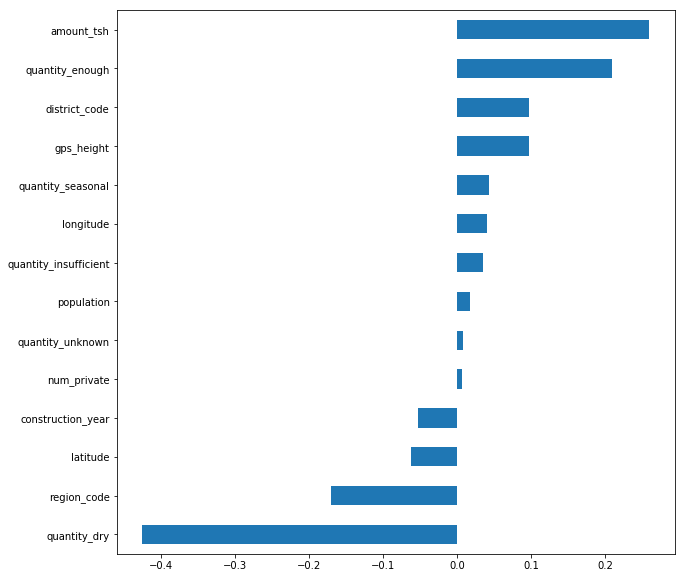

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [17]:
X_test_subset = test_f[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
all(X_test_encoded.columns == X_train_encoded.columns)

/home/gunther/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [18]:
ypred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = ypred
submission.to_csv('submission-01.csv', index=False)

In [19]:
!head submission-01.csv

id,status_group
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional
52449,functional
24806,functional
28965,non functional
36301,non functional


In [23]:
!kaggle --version


Kaggle API 1.5.4


In [24]:
!kaggle competitions submit -c ds5-predictive-modeling-challenge -f submission-01.csv -m "Gaels First submition"

100%|█████████████████████████████████████████| 245k/245k [00:02<00:00, 107kB/s]
Successfully submitted to DS5 Predictive Modeling Challenge